# Part II - Effects of House Features on Their Prices
## by Abdulwasiu Abdulraheem



## Investigation Overview

In this investigation, I wanted to look at the features of houses that could be used to predict their prices. The main focus was on the square footage of the home. 


## Dataset Overview


This dataset conatined house sale prices for King County. It consisted of prices and attributes of approximately 21,600 house sales data. The attributes included square footage of the home, grade, waterfront and overall condition as well as additional attributes such as bedrooms, bathrooms and floor. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(data)

In [3]:
# change data in condition to descriptive label
df['condition'] = df['condition'].astype(str)
df['condition'] = df['condition'].replace(['3', '5', '4', '1', '2'], ['Average','Very Good','Good','Poor','Fair'])

df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [4]:
# change data in waterfront to descriptive labels
df['waterfront'] = df['waterfront'].replace([0,1], ['No', 'Yes'])
df['waterfront'].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
# convert waterfront into categorical type
df['waterfront'] = pd.Categorical(df.waterfront)
df.waterfront.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

In [6]:
# convert condition and grade into ordered categorical types
ordinal_var_dict = {'condition': ['Poor','Fair','Average','Good','Very Good'],
                    'grade': [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [7]:
# data wrangling

# rename sqft_living column to a more descriptive name

df.rename(columns = {'sqft_living': 'home_square_footage'}, inplace = True)

df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'home_square_footage', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

## Distribution of House Prices

House prices in the dataset take on a very large range of values, from about  75000 at the lowest, to about 7,700,000 at the highest. Plotted on a logarithmic scale, the distribution of house sale prices takes on a bimodal shape.



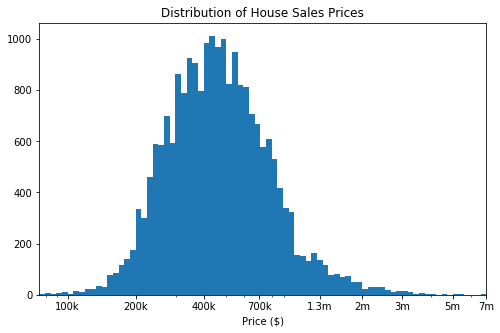

In [8]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(4.8, np.log10(df['price'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'price', bins = bins)
plt.title('Distribution of House Sales Prices')
plt.xscale('log')
plt.xlim([75000, 7000000])
plt.xticks([100000, 200000, 400000, 700000, 1300000, 2000000,3000000,5000000, 7000000], ['100k', '200k', '400k',  '700k', '1.3m', '2m', '3m', '5m', '7m'])
plt.xlabel('Price ($)')
plt.show()


## Distribution of The Square Footages

The square footage of a home is the measurement of amount of space that covers the living area of the house as separated from square footage of the lot and square footage of the basement. The square footage of a typical home in King County lies between 1000 and 2500 square feet. 

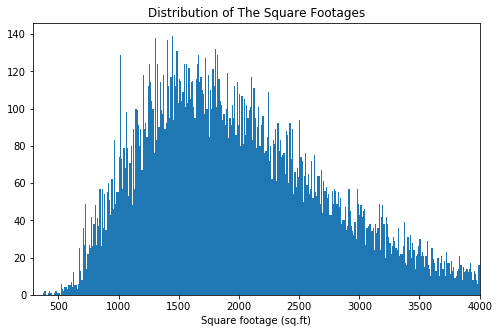

In [9]:
# the square footage distribution is also right-skewed
# let's investigate further by setting x lim to house within 4000 square footage and reduce the bin size

binsize = 10
bins = np.arange(290, df['home_square_footage'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'home_square_footage', bins = bins)
plt.title('Distribution of The Square Footages')
plt.xlim(290, 4000)
plt.xlabel('Square footage (sq.ft)')
plt.show()

In [10]:
print(df.home_square_footage.min())
print(df.home_square_footage.max())

290
13540


## Price vs. Square Footage

Plotting price  and square footage on a logarithmic scale produces an approximately linear relationship. There's a positive relationship between price and the square footage of the home: the higher the size of the footage of a house, the higher the price.

In [11]:
# compute the logarithm of price and sqft_living to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
df['log_price'] = df['price'].apply(log_trans)
df['log_sqft_living'] = df['home_square_footage'].apply(log_trans)



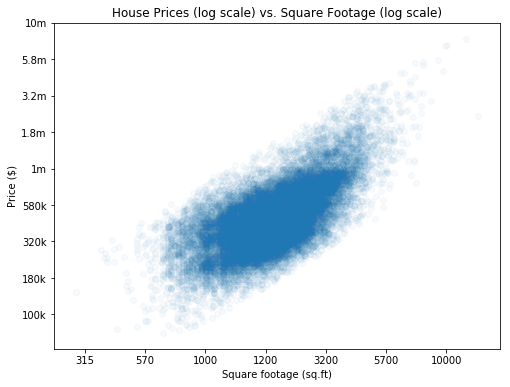

In [12]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'log_sqft_living', y = 'log_price', alpha = 1/30)

plt.title('House Prices (log scale) vs. Square Footage (log scale)')
plt.xticks([2.50,2.75,3.00,3.25,3.50,3.75,4.00], [315, 570, 1000, 1200, 3200, 5700, 10000])
plt.xlabel('Square footage (sq.ft)')
plt.yticks([5.00, 5.25, 5.50, 5.75, 6.00, 6.25, 6.50, 6.75, 7.00], ['100k', '180k', '320k', '580k', '1m', '1.8m', '3.2m','5.8m','10m'])
plt.ylabel('Price ($)')

plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [13]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 403529 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 